# MLFlow com Keras

In [3]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import *
from keras.datasets import mnist
import mlflow
import mlflow.tensorflow

Text(0.5, 1.0, '3')

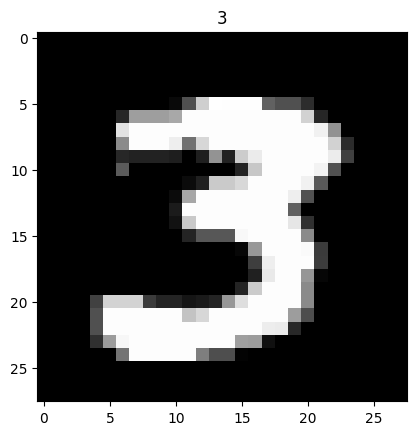

In [6]:
(X_treinamento, y_treinamento),(X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[27],cmap='gray')
plt.title(y_treinamento[27])

In [7]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [8]:
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
# Normalização
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')
X_treinamento /= 255
X_teste /= 255

In [10]:
y_treinamento = to_categorical(y_treinamento,10)
y_teste = to_categorical(y_teste,10)

In [12]:
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Criação do Modelo

In [13]:
def treina_dl(n_camadas_ocultas,n_units,activation,drop_out, epochs):
    mlflow.set_experiment("DLExperimento")
    
    with mlflow.start_run():
        mlflow.tensorflow.autolog()
        
        # Registro de tags
        mlflow.set_tag("n_camadas_ocultas",n_camadas_ocultas)
        mlflow.set_tag("n_units",n_units)
        mlflow.set_tag("activation",activation)
        mlflow.set_tag("drop_out",drop_out)
        mlflow.set_tag("epochs",epochs)

    
        modelo = Sequential()
        
        # Cria camada oculta mais camada de entrada
        modelo.add(Dense(units=n_units, activation=activation, input_dim=784))
        modelo.add(Dropout(drop_out))
        
        # Camadas ocultas adicionais, com dropout
        for n in range(n_camadas_ocultas):
            modelo.add(Dense(units=n_units, activation=activation))
            modelo.add(Dropout(drop_out))            
        
        # Camada de saída
        modelo.add(Dense(units=10,activation='softmax'))
        
        modelo.compile(optimizer='adam', loss="categorical_crossentropy",metrics=['accuracy'])
        
        modelo.summary()
        
        historico = modelo.fit(X_treinamento, y_treinamento, epochs =epochs, 
                              validation_data=(X_teste,y_teste))
        
        # Grafico para erros e acuracia
        historico.history.keys()
        loss = plt.plot(historico.history['val_loss'])
        plt.savefig("loss.png")
        acuracia = plt.plot(historico.history['val_accuracy'])
        plt.savefig("acuracia.png")
        
        # Registrar artefatos
        mlflow.log_artifact("loss.png")
        mlflow.log_artifact("acuracia.png")
       
        # Informações de execução
        print("Modelo: ", mlflow.active_run().info.run_uuid)  
    mlflow.end_run()     

In [ ]:
# Executando
n_camadas_ocultas = [1,2,3]
n_units = [16,32,64]
activation = ['relu','tanh']
drop_out = [0.1, 0.2]
epochs = [5,10,20]

for camadas in n_camadas_ocultas:
    for unidades in n_units:
        for ativacao in activation:
            for drop in drop_out:
                for epocas in epochs:
                    treina_dl(camadas,unidades,ativacao, drop, epocas)

2025/02/04 12:56:57 INFO mlflow.tracking.fluent: Experiment with name 'DLExperimento' does not exist. Creating a new experiment.
C:\Users\Emanuelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3630 - loss: 1.8694

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3632 - loss: 1.8686 - val_accuracy: 0.7074 - val_loss: 0.8981
Epoch 2/5
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6628 - loss: 0.9631

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6630 - loss: 0.9628 - val_accuracy: 0.8050 - val_loss: 0.6522
Epoch 3/5
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7485 - loss: 0.7608

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7485 - loss: 0.7608 - val_accuracy: 0.8397 - val_loss: 0.5487
Epoch 4/5
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7842 - loss: 0.6702

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7843 - loss: 0.6701 - val_accuracy: 0.8609 - val_loss: 0.4787
Epoch 5/5
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8116 - loss: 0.6044

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8116 - loss: 0.6044 - val_accuracy: 0.8755 - val_loss: 0.4366
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Modelo:  8e85551264844df7a0af6c4a8e7f3ccd


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2692 - loss: 1.9756

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2704 - loss: 1.9726 - val_accuracy: 0.6026 - val_loss: 1.1051
Epoch 2/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5730 - loss: 1.1391

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5732 - loss: 1.1386 - val_accuracy: 0.7424 - val_loss: 0.8011
Epoch 3/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6787 - loss: 0.9107

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6788 - loss: 0.9106 - val_accuracy: 0.7980 - val_loss: 0.6565
Epoch 4/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7369 - loss: 0.7838

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7370 - loss: 0.7837 - val_accuracy: 0.8390 - val_loss: 0.5702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7719 - loss: 0.7080

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7719 - loss: 0.7080 - val_accuracy: 0.8654 - val_loss: 0.5013
Epoch 6/10
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.6547

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7961 - loss: 0.6546 - val_accuracy: 0.8817 - val_loss: 0.4454
Epoch 7/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8133 - loss: 0.6053

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8133 - loss: 0.6053 - val_accuracy: 0.8880 - val_loss: 0.4178
Epoch 8/10
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8276 - loss: 0.5671

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8276 - loss: 0.5671 - val_accuracy: 0.8974 - val_loss: 0.3876
Epoch 9/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8311 - loss: 0.5549

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8311 - loss: 0.5549 - val_accuracy: 0.8992 - val_loss: 0.3744
Epoch 10/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8345 - loss: 0.5315

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8346 - loss: 0.5315 - val_accuracy: 0.8992 - val_loss: 0.3660
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Modelo:  a76cd3974e3d4bfd992b84ef976236d7


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3569 - loss: 1.9105

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3571 - loss: 1.9101 - val_accuracy: 0.7798 - val_loss: 0.8129
Epoch 2/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6942 - loss: 0.9127

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6942 - loss: 0.9127 - val_accuracy: 0.8300 - val_loss: 0.5823
Epoch 3/20
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7545 - loss: 0.7468

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7545 - loss: 0.7466 - val_accuracy: 0.8491 - val_loss: 0.5074
Epoch 4/20
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7794 - loss: 0.6770

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7794 - loss: 0.6769 - val_accuracy: 0.8705 - val_loss: 0.4581
Epoch 5/20
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8038 - loss: 0.6145

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8039 - loss: 0.6145 - val_accuracy: 0.8818 - val_loss: 0.4178
Epoch 6/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8176 - loss: 0.5825

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8176 - loss: 0.5824 - val_accuracy: 0.8900 - val_loss: 0.3849
Epoch 7/20
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8258 - loss: 0.5578

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8258 - loss: 0.5577 - val_accuracy: 0.8940 - val_loss: 0.3720
Epoch 8/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8336 - loss: 0.5288

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8336 - loss: 0.5288 - val_accuracy: 0.8995 - val_loss: 0.3512
Epoch 9/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8403 - loss: 0.5131

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8403 - loss: 0.5131 - val_accuracy: 0.9005 - val_loss: 0.3445
Epoch 10/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8465 - loss: 0.4889

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8465 - loss: 0.4889 - val_accuracy: 0.9011 - val_loss: 0.3373
Epoch 11/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8470 - loss: 0.4942

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8470 - loss: 0.4942 - val_accuracy: 0.9075 - val_loss: 0.3228
Epoch 12/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8521 - loss: 0.4738

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8521 - loss: 0.4738 - val_accuracy: 0.9043 - val_loss: 0.3214
Epoch 13/20
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8570 - loss: 0.4603

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8569 - loss: 0.4604 - val_accuracy: 0.9083 - val_loss: 0.3125
Epoch 14/20
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8559 - loss: 0.4620

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8559 - loss: 0.4620 - val_accuracy: 0.9099 - val_loss: 0.3046
Epoch 15/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8570 - loss: 0.4580 - val_accuracy: 0.9088 - val_loss: 0.3086
Epoch 16/20
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8600 - loss: 0.4467

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8600 - loss: 0.4467 - val_accuracy: 0.9120 - val_loss: 0.2963
Epoch 17/20
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8609 - loss: 0.4454

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8609 - loss: 0.4453 - val_accuracy: 0.9132 - val_loss: 0.2925
Epoch 18/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.4418

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8631 - loss: 0.4418 - val_accuracy: 0.9147 - val_loss: 0.2925
Epoch 19/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8641 - loss: 0.4384

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8641 - loss: 0.4384 - val_accuracy: 0.9172 - val_loss: 0.2869
Epoch 20/20
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8649 - loss: 0.4334

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8649 - loss: 0.4333 - val_accuracy: 0.9175 - val_loss: 0.2848
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Modelo:  16a4c07753fd490ea6dcc28d4fb95da7


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2699 - loss: 2.0154

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2699 - loss: 2.0152 - val_accuracy: 0.5776 - val_loss: 1.2687
Epoch 2/5
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4693 - loss: 1.3963

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4693 - loss: 1.3963 - val_accuracy: 0.6642 - val_loss: 1.0607
Epoch 3/5
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5424 - loss: 1.2525

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5425 - loss: 1.2524 - val_accuracy: 0.7268 - val_loss: 0.9284
Epoch 4/5
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5900 - loss: 1.1538

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5901 - loss: 1.1537 - val_accuracy: 0.7679 - val_loss: 0.8305
Epoch 5/5
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6292 - loss: 1.0744

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6292 - loss: 1.0744 - val_accuracy: 0.7869 - val_loss: 0.7655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Modelo:  fa62a8fad77a49798ebaa9b898297db5


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3303 - loss: 1.9166

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3305 - loss: 1.9161 - val_accuracy: 0.6857 - val_loss: 0.9948
Epoch 2/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5867 - loss: 1.1303

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5869 - loss: 1.1299 - val_accuracy: 0.7599 - val_loss: 0.7968
Epoch 3/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6538 - loss: 0.9773

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6539 - loss: 0.9772 - val_accuracy: 0.8008 - val_loss: 0.6953
Epoch 4/10
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6956 - loss: 0.8928

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6956 - loss: 0.8927 - val_accuracy: 0.8344 - val_loss: 0.6173
Epoch 5/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7290 - loss: 0.8178

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7290 - loss: 0.8178 - val_accuracy: 0.8551 - val_loss: 0.5571
Epoch 6/10
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7469 - loss: 0.7722

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7469 - loss: 0.7722 - val_accuracy: 0.8596 - val_loss: 0.5244
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7659 - loss: 0.7374

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7659 - loss: 0.7374 - val_accuracy: 0.8703 - val_loss: 0.4912
Epoch 8/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7778 - loss: 0.7060

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7778 - loss: 0.7060 - val_accuracy: 0.8743 - val_loss: 0.4725
Epoch 9/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7824 - loss: 0.7007

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7824 - loss: 0.7007 - val_accuracy: 0.8753 - val_loss: 0.4573
Epoch 10/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7853 - loss: 0.6901

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7854 - loss: 0.6901 - val_accuracy: 0.8768 - val_loss: 0.4449


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Modelo:  6d6586fc7a9b41598242c98ae0640bcf


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2531 - loss: 2.0364

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2534 - loss: 2.0355 - val_accuracy: 0.5347 - val_loss: 1.3150
Epoch 2/20
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4659 - loss: 1.3766

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4661 - loss: 1.3761 - val_accuracy: 0.6833 - val_loss: 0.9913
Epoch 3/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5722 - loss: 1.1588

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5723 - loss: 1.1586 - val_accuracy: 0.7591 - val_loss: 0.8282
Epoch 4/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6281 - loss: 1.0493

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6281 - loss: 1.0493 - val_accuracy: 0.8034 - val_loss: 0.7212
Epoch 5/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6632 - loss: 0.9698

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6632 - loss: 0.9698 - val_accuracy: 0.8375 - val_loss: 0.6392
Epoch 6/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6874 - loss: 0.9146

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6874 - loss: 0.9146 - val_accuracy: 0.8548 - val_loss: 0.5722
Epoch 7/20
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7016 - loss: 0.8736

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7016 - loss: 0.8736 - val_accuracy: 0.8687 - val_loss: 0.5250
Epoch 8/20
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 0.8275

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7204 - loss: 0.8275 - val_accuracy: 0.8747 - val_loss: 0.4880
Epoch 9/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7303 - loss: 0.8009

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7303 - loss: 0.8009 - val_accuracy: 0.8782 - val_loss: 0.4526
Epoch 10/20
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7445 - loss: 0.7694

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7446 - loss: 0.7694 - val_accuracy: 0.8821 - val_loss: 0.4378
Epoch 11/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7478 - loss: 0.7588

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7478 - loss: 0.7587 - val_accuracy: 0.8817 - val_loss: 0.4288
Epoch 12/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7522 - loss: 0.7483

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7522 - loss: 0.7483 - val_accuracy: 0.8897 - val_loss: 0.4129
Epoch 13/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7563 - loss: 0.7287

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7563 - loss: 0.7287 - val_accuracy: 0.8931 - val_loss: 0.4008
Epoch 14/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7641 - loss: 0.7191

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7641 - loss: 0.7191 - val_accuracy: 0.8927 - val_loss: 0.4006
Epoch 15/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7600 - loss: 0.7212

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7600 - loss: 0.7212 - val_accuracy: 0.8952 - val_loss: 0.3959
Epoch 16/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7665 - loss: 0.7099

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7665 - loss: 0.7099 - val_accuracy: 0.8963 - val_loss: 0.3870
Epoch 17/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7682 - loss: 0.7070

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7682 - loss: 0.7070 - val_accuracy: 0.8992 - val_loss: 0.3815
Epoch 18/20
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7678 - loss: 0.6994

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7678 - loss: 0.6994 - val_accuracy: 0.8972 - val_loss: 0.3799
Epoch 19/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7738 - loss: 0.6875

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7738 - loss: 0.6875 - val_accuracy: 0.9001 - val_loss: 0.3743
Epoch 20/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7720 - loss: 0.7020 - val_accuracy: 0.8974 - val_loss: 0.3768


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Modelo:  c3a1a4f4134c4aa797644095a7980cab


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4309 - loss: 1.6897

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4317 - loss: 1.6874 - val_accuracy: 0.7949 - val_loss: 0.7013
Epoch 2/5
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7863 - loss: 0.6938

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7864 - loss: 0.6937 - val_accuracy: 0.8549 - val_loss: 0.5068
Epoch 3/5
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: 0.5569

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8320 - loss: 0.5568 - val_accuracy: 0.8691 - val_loss: 0.4499
Epoch 4/5
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8541 - loss: 0.5017

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8541 - loss: 0.5017 - val_accuracy: 0.8845 - val_loss: 0.4059
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.4614

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8667 - loss: 0.4614 - val_accuracy: 0.8978 - val_loss: 0.3677
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Modelo:  62b72760a0f949d38b049a8b76573544


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4002 - loss: 1.7192

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4013 - loss: 1.7165 - val_accuracy: 0.7934 - val_loss: 0.6608
Epoch 2/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7832 - loss: 0.6699

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7832 - loss: 0.6697 - val_accuracy: 0.8613 - val_loss: 0.4626
Epoch 3/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8418 - loss: 0.5131

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8418 - loss: 0.5131 - val_accuracy: 0.8805 - val_loss: 0.4011
Epoch 4/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8585 - loss: 0.4744

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8586 - loss: 0.4744 - val_accuracy: 0.8878 - val_loss: 0.3786
Epoch 5/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8669 - loss: 0.4432

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8669 - loss: 0.4432 - val_accuracy: 0.8933 - val_loss: 0.3605
Epoch 6/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8736 - loss: 0.4229

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8736 - loss: 0.4229 - val_accuracy: 0.8996 - val_loss: 0.3446
Epoch 7/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8821 - loss: 0.4006

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8821 - loss: 0.4006 - val_accuracy: 0.9001 - val_loss: 0.3336
Epoch 8/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8832 - loss: 0.3977

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8832 - loss: 0.3976 - val_accuracy: 0.9050 - val_loss: 0.3223
Epoch 9/10
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8890 - loss: 0.3826

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8890 - loss: 0.3826 - val_accuracy: 0.9060 - val_loss: 0.3182
Epoch 10/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8920 - loss: 0.3762

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8920 - loss: 0.3762 - val_accuracy: 0.9095 - val_loss: 0.3118
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Modelo:  7a41495d4d20470b86ed6d715bb86bb3


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4286 - loss: 1.7024

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.4291 - loss: 1.7009 - val_accuracy: 0.7979 - val_loss: 0.6646
Epoch 2/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7868 - loss: 0.6839

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7869 - loss: 0.6838 - val_accuracy: 0.8402 - val_loss: 0.5296
Epoch 3/20
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8236 - loss: 0.5814

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8236 - loss: 0.5813 - val_accuracy: 0.8662 - val_loss: 0.4527
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8474 - loss: 0.5123

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8474 - loss: 0.5123 - val_accuracy: 0.8800 - val_loss: 0.4005
Epoch 5/20
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8668 - loss: 0.4567

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8668 - loss: 0.4566 - val_accuracy: 0.8924 - val_loss: 0.3624
Epoch 6/20
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8751 - loss: 0.4300

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8752 - loss: 0.4300 - val_accuracy: 0.8997 - val_loss: 0.3408
Epoch 7/20
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8826 - loss: 0.4028

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8826 - loss: 0.4028 - val_accuracy: 0.9033 - val_loss: 0.3275
Epoch 8/20
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8869 - loss: 0.3921

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8869 - loss: 0.3921 - val_accuracy: 0.9065 - val_loss: 0.3220
Epoch 9/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8903 - loss: 0.3780

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8903 - loss: 0.3781 - val_accuracy: 0.9092 - val_loss: 0.3172
Epoch 10/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8916 - loss: 0.3772

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8916 - loss: 0.3772 - val_accuracy: 0.9112 - val_loss: 0.3050
Epoch 11/20
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8930 - loss: 0.3658

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8930 - loss: 0.3658 - val_accuracy: 0.9118 - val_loss: 0.3028
Epoch 12/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8967 - loss: 0.3588

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8967 - loss: 0.3589 - val_accuracy: 0.9111 - val_loss: 0.2976
Epoch 13/20
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8950 - loss: 0.3566

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8950 - loss: 0.3566 - val_accuracy: 0.9133 - val_loss: 0.2953
Epoch 14/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8974 - loss: 0.3551

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8974 - loss: 0.3551 - val_accuracy: 0.9164 - val_loss: 0.2923
Epoch 15/20
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8985 - loss: 0.3459

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8985 - loss: 0.3459 - val_accuracy: 0.9158 - val_loss: 0.2902
Epoch 16/20
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9001 - loss: 0.3383

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9001 - loss: 0.3383 - val_accuracy: 0.9173 - val_loss: 0.2855
Epoch 17/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9031 - loss: 0.3371

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9031 - loss: 0.3371 - val_accuracy: 0.9177 - val_loss: 0.2817
Epoch 18/20
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9035 - loss: 0.3352

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9035 - loss: 0.3352 - val_accuracy: 0.9205 - val_loss: 0.2780
Epoch 19/20
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9036 - loss: 0.3297

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9036 - loss: 0.3298 - val_accuracy: 0.9209 - val_loss: 0.2774
Epoch 20/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9035 - loss: 0.3341

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9035 - loss: 0.3341 - val_accuracy: 0.9202 - val_loss: 0.2761
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Modelo:  60ab73046afd472fbadddf2acfe1c953


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4165 - loss: 1.7551

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4173 - loss: 1.7528 - val_accuracy: 0.7750 - val_loss: 0.7793
Epoch 2/5
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7482 - loss: 0.8017

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7483 - loss: 0.8013 - val_accuracy: 0.8575 - val_loss: 0.4870
Epoch 3/5
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8063 - loss: 0.6215

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8064 - loss: 0.6214 - val_accuracy: 0.8727 - val_loss: 0.4222
Epoch 4/5
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8260 - loss: 0.5659

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8260 - loss: 0.5659 - val_accuracy: 0.8834 - val_loss: 0.3955
Epoch 5/5
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8386 - loss: 0.5255

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8386 - loss: 0.5255 - val_accuracy: 0.8858 - val_loss: 0.3785
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Modelo:  98637aa6f1ed470e9a7883a5280ce2d6


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3972 - loss: 1.7526

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3982 - loss: 1.7496 - val_accuracy: 0.7368 - val_loss: 0.8113
Epoch 2/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7126 - loss: 0.8560

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7127 - loss: 0.8557 - val_accuracy: 0.8325 - val_loss: 0.5626
Epoch 3/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7921 - loss: 0.6598

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7921 - loss: 0.6598 - val_accuracy: 0.8633 - val_loss: 0.4560
Epoch 4/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8166 - loss: 0.5913

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8166 - loss: 0.5913 - val_accuracy: 0.8747 - val_loss: 0.4214
Epoch 5/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8313 - loss: 0.5480

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8313 - loss: 0.5480 - val_accuracy: 0.8782 - val_loss: 0.4027
Epoch 6/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8374 - loss: 0.5349

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8374 - loss: 0.5349 - val_accuracy: 0.8830 - val_loss: 0.3942
Epoch 7/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.5261

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8423 - loss: 0.5261 - val_accuracy: 0.8828 - val_loss: 0.3892
Epoch 8/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8456 - loss: 0.5123

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8456 - loss: 0.5123 - val_accuracy: 0.8866 - val_loss: 0.3794
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8520 - loss: 0.4989 - val_accuracy: 0.8860 - val_loss: 0.3813
Epoch 10/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8521 - loss: 0.4979

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8521 - loss: 0.4979 - val_accuracy: 0.8882 - val_loss: 0.3779
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Modelo:  f870d99686ef4b31b94b7f7bf0e3b13f


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4121 - loss: 1.7089

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4131 - loss: 1.7062 - val_accuracy: 0.7693 - val_loss: 0.7522
Epoch 2/20
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7351 - loss: 0.8054

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7352 - loss: 0.8051 - val_accuracy: 0.8299 - val_loss: 0.5475
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7997 - loss: 0.6451

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7998 - loss: 0.6451 - val_accuracy: 0.8587 - val_loss: 0.4545
Epoch 4/20
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8229 - loss: 0.5698

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8229 - loss: 0.5698 - val_accuracy: 0.8736 - val_loss: 0.4174
Epoch 5/20
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8346 - loss: 0.5424

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8347 - loss: 0.5423 - val_accuracy: 0.8781 - val_loss: 0.4006
Epoch 6/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8422 - loss: 0.5223

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8422 - loss: 0.5223 - val_accuracy: 0.8859 - val_loss: 0.3834
Epoch 7/20
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8471 - loss: 0.5090

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8471 - loss: 0.5089 - val_accuracy: 0.8879 - val_loss: 0.3766
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.4931

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8558 - loss: 0.4931 - val_accuracy: 0.8908 - val_loss: 0.3681
Epoch 9/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8574 - loss: 0.4890

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8574 - loss: 0.4890 - val_accuracy: 0.8916 - val_loss: 0.3642
Epoch 10/20
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.4853

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8595 - loss: 0.4852 - val_accuracy: 0.8960 - val_loss: 0.3631
Epoch 11/20
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8604 - loss: 0.4685 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4589s 2s/step - accuracy: 0.8604 - loss: 0.4686 - val_accuracy: 0.8970 - val_loss: 0.3527
Epoch 12/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8646 - loss: 0.4753

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8646 - loss: 0.4753 - val_accuracy: 0.8976 - val_loss: 0.3485
Epoch 13/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8615 - loss: 0.4646 - val_accuracy: 0.8990 - val_loss: 0.3485
Epoch 14/20
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.4569

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8666 - loss: 0.4569 - val_accuracy: 0.9031 - val_loss: 0.3396
Epoch 15/20
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8651 - loss: 0.4555

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8652 - loss: 0.4555 - val_accuracy: 0.9014 - val_loss: 0.3327
Epoch 16/20
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.4495

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8704 - loss: 0.4495 - val_accuracy: 0.9036 - val_loss: 0.3324
Epoch 17/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8735 - loss: 0.4383

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8734 - loss: 0.4383 - val_accuracy: 0.9065 - val_loss: 0.3232
Epoch 18/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.4421

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8704 - loss: 0.4421 - val_accuracy: 0.9078 - val_loss: 0.3230
Epoch 19/20
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.4323

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8742 - loss: 0.4324 - val_accuracy: 0.9095 - val_loss: 0.3153
Epoch 20/20
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8721 - loss: 0.4336

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8721 - loss: 0.4335 - val_accuracy: 0.9097 - val_loss: 0.3146
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Modelo:  00584647f0654000884a5e9892f5035b


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1855/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4134 - loss: 1.7512

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4149 - loss: 1.7465 - val_accuracy: 0.7826 - val_loss: 0.7423
Epoch 2/5
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7573 - loss: 0.7638

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7573 - loss: 0.7637 - val_accuracy: 0.8614 - val_loss: 0.5009
Epoch 3/5
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8241 - loss: 0.5762

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8242 - loss: 0.5761 - val_accuracy: 0.8796 - val_loss: 0.4126
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8504 - loss: 0.4920

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8504 - loss: 0.4920 - val_accuracy: 0.8953 - val_loss: 0.3629
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8706 - loss: 0.4333

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8706 - loss: 0.4333 - val_accuracy: 0.9052 - val_loss: 0.3275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Modelo:  08233cb6a6014e5dabca55512f4f611c


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4288 - loss: 1.6751

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4298 - loss: 1.6722 - val_accuracy: 0.8089 - val_loss: 0.6459
Epoch 2/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7819 - loss: 0.6879

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7820 - loss: 0.6877 - val_accuracy: 0.8676 - val_loss: 0.4626
Epoch 3/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.5256

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8423 - loss: 0.5255 - val_accuracy: 0.8983 - val_loss: 0.3659
Epoch 4/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8682 - loss: 0.4532

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8683 - loss: 0.4531 - val_accuracy: 0.9078 - val_loss: 0.3230
Epoch 5/10
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8812 - loss: 0.4033

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8812 - loss: 0.4033 - val_accuracy: 0.9126 - val_loss: 0.2948
Epoch 6/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8894 - loss: 0.3735

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8894 - loss: 0.3735 - val_accuracy: 0.9192 - val_loss: 0.2723
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8939 - loss: 0.3543

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8939 - loss: 0.3543 - val_accuracy: 0.9245 - val_loss: 0.2564
Epoch 8/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9014 - loss: 0.3266

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9014 - loss: 0.3266 - val_accuracy: 0.9271 - val_loss: 0.2427
Epoch 9/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9072 - loss: 0.3111

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9072 - loss: 0.3111 - val_accuracy: 0.9296 - val_loss: 0.2292
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9135 - loss: 0.2890

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9135 - loss: 0.2890 - val_accuracy: 0.9327 - val_loss: 0.2203
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Modelo:  07c203dc54424891a6a7a10696c19b3b


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3908 - loss: 1.7485

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3915 - loss: 1.7466 - val_accuracy: 0.7375 - val_loss: 0.8163
Epoch 2/20
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7178 - loss: 0.8318

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7180 - loss: 0.8313 - val_accuracy: 0.8375 - val_loss: 0.5552
Epoch 3/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 0.6292

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8020 - loss: 0.6291 - val_accuracy: 0.8715 - val_loss: 0.4424
Epoch 4/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8409 - loss: 0.5228

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8410 - loss: 0.5227 - val_accuracy: 0.8914 - val_loss: 0.3764
Epoch 5/20
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8602 - loss: 0.4642

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8602 - loss: 0.4642 - val_accuracy: 0.9031 - val_loss: 0.3338
Epoch 6/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8742 - loss: 0.4161

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8743 - loss: 0.4160 - val_accuracy: 0.9094 - val_loss: 0.3092
Epoch 7/20
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8836 - loss: 0.3874

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8836 - loss: 0.3873 - val_accuracy: 0.9172 - val_loss: 0.2818
Epoch 8/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8912 - loss: 0.3630

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8912 - loss: 0.3630 - val_accuracy: 0.9153 - val_loss: 0.2710
Epoch 9/20
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8969 - loss: 0.3433

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8969 - loss: 0.3433 - val_accuracy: 0.9233 - val_loss: 0.2528
Epoch 10/20
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9010 - loss: 0.3290

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9010 - loss: 0.3290 - val_accuracy: 0.9253 - val_loss: 0.2431
Epoch 11/20
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9048 - loss: 0.3158

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9048 - loss: 0.3158 - val_accuracy: 0.9293 - val_loss: 0.2332
Epoch 12/20
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9039 - loss: 0.3117

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9039 - loss: 0.3116 - val_accuracy: 0.9297 - val_loss: 0.2282
Epoch 13/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9068 - loss: 0.3006

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9068 - loss: 0.3006 - val_accuracy: 0.9336 - val_loss: 0.2175
Epoch 14/20
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9126 - loss: 0.2858

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9126 - loss: 0.2858 - val_accuracy: 0.9354 - val_loss: 0.2086
Epoch 15/20
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9137 - loss: 0.2837

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9137 - loss: 0.2837 - val_accuracy: 0.9367 - val_loss: 0.2057
Epoch 16/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9179 - loss: 0.2709

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9179 - loss: 0.2709 - val_accuracy: 0.9379 - val_loss: 0.2010
Epoch 17/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9195 - loss: 0.2643

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9195 - loss: 0.2643 - val_accuracy: 0.9380 - val_loss: 0.1989
Epoch 18/20
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9215 - loss: 0.2595

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9215 - loss: 0.2595 - val_accuracy: 0.9408 - val_loss: 0.1911
Epoch 19/20
1033/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9195 - loss: 0.2586